# Assignment objective

We have data from Raleigh, NC, where we recently deployed a flyer program in order to increase public awareness of the possibility of taking a Pagaya loan. You objective is to assess the potency of the flyer program in terms of activation by analyzing production and TU data obtained from the town.


# Basic imports 

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Data preparation

## Data from TU 

To begin with, upload TUs credit information from the relevant quarter (which is 2018Q3). This data is available in our `s3` path under the name `tu_gen_data2018Q3.parquet`. To get to our `s3` path import `DATA_FILES_PATH` from `pagayapro.paths.data_paths`

In [67]:
from pagayapro.paths.data_paths import DATA_FILES_PATH

read the parquet file from `s3`. Only read the columns ["sequence_num", "credit_score", "listing_term", "int_rate", "loan_amnt", "monthly_pmt", "original_state"]

In [68]:
tu_data= pd.read_parquet(
    os.path.join(DATA_FILES_PATH,"tu_gen_data_2018Q3.parquet"),
                columns = ["sequence_num", "credit_score", 
                           "listing_term", "int_rate" ,
                           "loan_amnt", "monthly_pmt", 
                           "original_state"])

In [69]:
tu_data.credit_score.nunique()

446

Output the first 5 rows of tu_data

In [70]:
tu_data.head(5)

,sequence_num,credit_score,listing_term,int_rate,loan_amnt,monthly_pmt,original_state
id,,,,,,,
adf5219e4cb985352184eb7fa597737e4a9777f7354f7a8a58270da147792561,d0820401b209782dae4284b3dd96b41e08c3e8566fbb33...,814,36.0,7.86,5500.0,172.0,MI
0a0f130443af4c6597bb074942970eaddeb125d398e2cca42175c56befc8a171,2f05cd66cb998e5e55f6f296344b271b2b89b996c7c037...,800,36.0,7.91,20000.0,626.0,NM
4ba9c6a38b650ee06b8b88a48621bd363cdf611e63400c6fc4bbffbd1bf20c47,20bdbfaf0006db032d8a4176add08fd4ef45abfb17c474...,653,36.0,30.51,3674.0,157.0,SD
dae3a344292e07d4b8935a453c37aef01303f21b2f37ccbd1c4408f158533acb,53084498c6bf053a4d1cf309e1b8ec234e503bb1a3dd4e...,623,60.0,23.46,14056.0,400.0,NC
8af2ae2462d012e4d85aa687a16a4f5fb64525928235da43c795f73dc0cadd04,f750c4ecac12ae1c156998ed3dff3f46d2d19f37250074...,627,60.0,25.55,8659.0,257.0,TN


## Activation data 

Your data regarding activation arrives as forms, detailing the loan amount, interest rate offered to the client and whether he or she accepted the offer. These are available on the assignment's `s3` path, which you can import from `pagayapro.path.data_paths` under the name `ASSIGNMENT1_DATA`, in the subdirectory `offers`. Since we are reading multiple files from `s3` we will also import the `s3fs` package which allows us to do just that (similar to `glob`, only for `s3`).

In [71]:
from pagayapro.paths.data_paths import ASSIGNMENT1_DATA
import s3fs

Read all files in the subdirectory `offers` of `ASSIGNMENT1_DATA` whose name contains the substring `raleigh`.

In [72]:
raleigh_forms= (
    s3fs
    .S3FileSystem().glob(
        os.path.join(ASSIGNMENT1_DATA,"offers/*raleigh*")
    )
)

how many forms are there?


In [73]:
len(raleigh_forms)

769

Read all the form files and create a table which contains only the last offer given to each borrower. Call this dataframe `raleigh_df`.

In [74]:
raleigh_df = (
    pd.concat(map(lambda f: pd.read_csv("s3://"+ f), raleigh_forms))
    .sort_values(by = "offer_date", ascending=True)
    .drop_duplicates(subset= ["id"], keep= "last")
)

In [75]:
raleigh_df

,id,sequence_num,requested_amount,offered_interest_rate,offer_accepted,offer_date
0,743200d3e4cc1f6f860e121294248d611350f257a7bc83...,ec10245656d9d89186fb4e5890082eea989d5967752ce7...,3000.0,17.69,False,2018-01-01
18,9b785f1c83a022947857aa109de2aeb3c2c54231b910ed...,4f94dbec44bd09b1c47b08f17a62a7b58b17fc108b077f...,7000.0,17.98,False,2018-01-01
16,0f0b253809bb99eb4cd76ba8089f5746f2345ae3c59535...,b27933d6634f47eef5d66650874bc0df2e1fda04a9827f...,3505.0,29.58,True,2018-01-01
1,e3e32f85cd78bb5002ccdc037c1818029f716e7a47911e...,3dcd131256c103fccb61c75cd79ca97fa2b5e31c4ab03e...,6899.0,12.56,False,2018-01-01
2,3a72ae7a82244f811b37c48f57469b708207004f011163...,06c005c5de6ba445d4c709b84611ac2b8542cd5d37221b...,3800.0,12.97,False,2018-01-01
...,...,...,...,...,...,...
2,a2b763a8d324fd4bdd37ac7ad5bee9d62f936c52dd3c95...,77b3642dd8bc768d19a6b80466e5f7113e7372e1b1aa03...,17725.0,16.10,False,2020-12-10
0,69b282258fdc0b55336a5c88e94dd0c0a4fdac7a6a448b...,8b1ed3ba66907feb4c208578846eddf03fc09c8a605048...,15000.0,15.27,False,2020-12-10
9,46835ae976bb2c0790a1c283a74465be1b5a7cbd184198...,96be5e312cac0e00f7a0dc65d066f5da1de236336bd7c8...,10000.0,15.27,False,2020-12-10
4,3aeb261118f66f05bd53de007f302a55da2554452f52f2...,b566fa6f6fba6c9afce55518c839f5126b7937b5abc7ff...,6174.0,6.91,False,2020-12-10


How many rows are there in your table? How many distict ids?

In [76]:
raleigh_df.shape[0]

8792

In [77]:
raleigh_df.id.shape[0]

8792

**If you did not get the same number above** : How can you explain the duplicate ids? Sample 5 ids with multiple lines and display them.

<span style="color:teal">If you got duplicate ids it's probably because you mistakenly included old offers from the client, which were rejected. These need to be dropped, because the only offer that makes a difference is the last one.</span>

Drop all lines in the dataframe which contain irrelevant information.

In [78]:
raleigh_df= (
    raleigh_df
    .sort_values(by="offer_date", ascending= True)
    .drop_duplicates(subset = ["id"], keep="last")
)

What is the average interest rate offered to clients? What is the average among clients who accepted the offer?

In [79]:
raleigh_df.offered_interest_rate.mean(), raleigh_df.query("offer_accepted").offered_interest_rate.mean()

(15.524284576888144, 15.307480314960618)

What is the percentage of activation in this dataframe?

In [80]:
raleigh_df.offer_accepted.mean()

0.08666969972702457

Enrich your dataframe with additioanl TU features by merging it with the `tu_data` df. Note that the two dataframe share the `id` and `sequence_num` features.

In [81]:
raleigh_df = (
    raleigh_df
    .merge(
        tu_data, on=["id", "sequence_num"], 
        how="left"
    )
)

What is the average credit score of the clients? What is the average among clients who accepted the offer?

In [82]:
raleigh_df.credit_score.mean(), raleigh_df.query("offer_accepted").credit_score.mean()

(689.821542311192, 702.5446194225722)

# Validations

Before we embark on a statistical test, let's do some validations to make sure that the Raleigh sample is not somehow distinct from the general population. Our random sample from the general population is the TU data.

Create a histogram to describe the distribution of requested loan amounts in Raleigh and in the general population. Do the distributions look similar? (A good rule-of-thumb for the number of bins to use is the square-root of the number of unique value.)

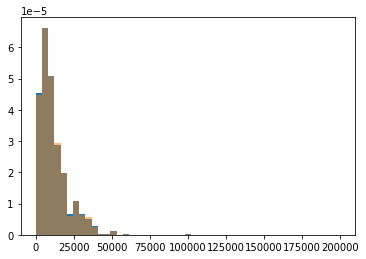

In [83]:
plt.hist(raleigh_df.requested_amount, bins= np.linspace(0,200_000,50), density=True);
plt.hist(tu_data.loan_amnt, bins= np.linspace(0,200_000,50), density=True, alpha = 0.5);

Describe the loan amount distribution using `seaborn.distplot` in the Raleigh dataframe and in TU.

/root/wd/venv/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/root/wd/venv/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


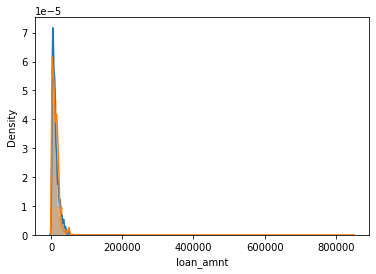

In [84]:
sns.distplot(raleigh_df.requested_amount);
sns.distplot(tu_data.loan_amnt);

We also want to verify that the offered interest rate in Raleigh seem similar to those in the general population. 
Create a histogram to describe the distribution of offered interest rates in Raleigh and interest rates in the general population. Do the distributions look similar?

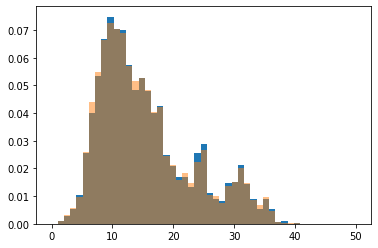

In [85]:
plt.hist(raleigh_df.offered_interest_rate, bins= np.linspace(0,50,50), density=True);
plt.hist(tu_data.int_rate, bins= np.linspace(0,50,50), density=True, alpha = 0.5);

Describe the interest rate distribution using `sns.distplot` in the Raleigh dataframe and in TU.

/root/wd/venv/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/root/wd/venv/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


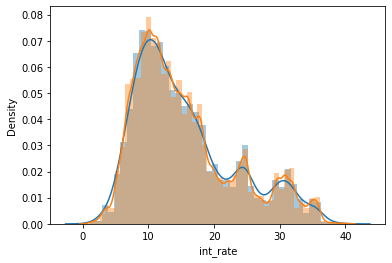

In [86]:
sns.distplot(raleigh_df.offered_interest_rate);
sns.distplot(tu_data.int_rate);

Additionally, we want to make sure the credit scores are not visibly different in Raleigh from the general population, as this might mean that the data we obtained from the town might not be representative of the general popuation.

Create a histogram to describe the distribution of credit scores in the Raleigh sample and in the general population. Do the distributions look similar? How many bins did you use?

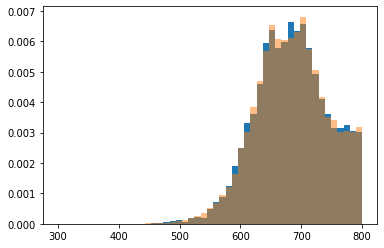

In [87]:
plt.hist(raleigh_df.credit_score, bins= np.linspace(300,800,50), density=True);
plt.hist(tu_data.credit_score, bins= np.linspace(300,800,50), density=True, alpha = 0.5);

Describe the credit score distribution using `sns.distplot`  in the Raleigh dataframe and in TU.

/root/wd/venv/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/root/wd/venv/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


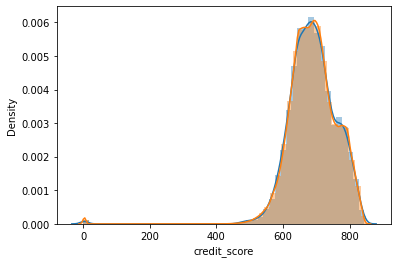

In [88]:
sns.distplot(raleigh_df.credit_score);
sns.distplot(tu_data.credit_score);

Finally, check whether the loans in both datasets have similar distributions of term (i.e. the amount of months the borrower takes the loan for). What values of term exist in the data?

In [89]:
raleigh_df.listing_term.value_counts(normalize=True)

36.0    0.55687
60.0    0.44313
Name: listing_term, dtype: float64

In [90]:
tu_data.listing_term.value_counts(normalize=True)

36.0    0.557304
60.0    0.442696
Name: listing_term, dtype: float64

# CLT in action

One more thing before we start the test. Our goal is to check whether, for which we'll run some statistical test (you probably already know which) which checks if something belongs to a noraml distribution with some mean and some variance. But... is activation normally distributed in the Raliegh sample? 

<span style="color:teal">
No, it has only two values... Normal distribution is continuous</span>

The reason why we can assume normality is because we're checking averages of samples and we're relying on the Central Limit Theorem. We won't prove the theorem, but let's test it for a bit. 

Write a function which takes a pandas series S and a natural number n and creates a series of means of samples (with replacement) of n entries from S. Decide for yourself on the length of the output series. You can also use a different data structure if you find it more suitable as the output.

In [91]:
def average_sampler(s: pd.Series, n:int):
    return (
        np.random.choice(
            s.values, 
            size= (len(s),n),
            replace= True
        )
        .mean(axis= 1)
    )

Optionally, also create a function which, given the same input as above, plots a histogram of the series of means, and also indicates the mean of this series.

In [92]:
def plot_sample_averages(s: pd.Series, n:int):
    avg_arr = average_sampler(s, n)
    plt.hist(avg_arr, density=True, bins= np.linspace(0, 1, 2 * np.ceil(np.sqrt(len(np.unique(avg_arr))))));
    plt.axvline(avg_arr.mean());#, [0, np.unique(avg_arr, return_counts=True)[1].max()])

Generate plots of the series of means of activation in Raleigh and for n = 1, 2, 5, 10, 100, 1000 and 1e6, and indicate their means. Does the distribution approach a normal distribution as $n\to\infty$ in your opinion?

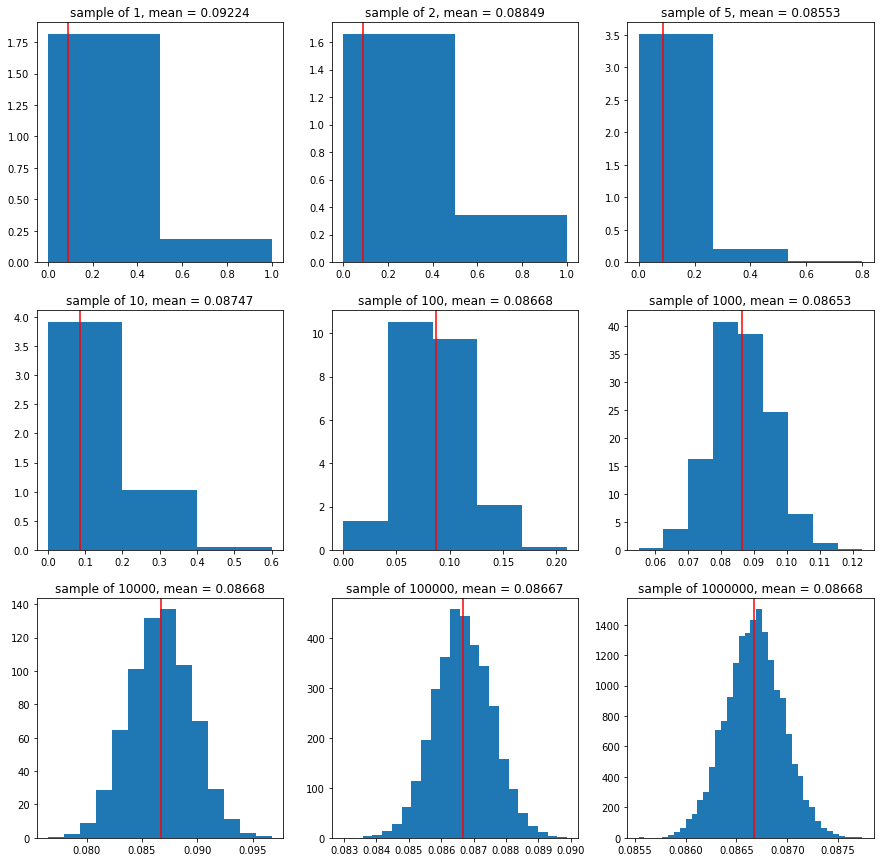

In [93]:
fig, axs = plt.subplots(3, 3, figsize=(15,15))
for i, n in enumerate([1, 2, 5, 10, 100, 1000, 10_000, 100_000, 1_000_000]):
    avg_arr = average_sampler(raleigh_df.offer_accepted, n)
    axs[i // 3, i % 3].hist(avg_arr,  
                            bins=round(np.ceil(np.sqrt(len(np.unique(avg_arr))))),
                            density=True)
    axs[i//3, i%3].axvline(avg_arr.mean(), color="r");
    axs[i//3, i%3].title.set_text(f"sample of {n}, mean = {avg_arr.mean():.5f}");
    

Now that your fuction is ready, it's time to make it part of our infrastucture:
* Inside the `pagayapro` repo, create a branch called `feature/{your_user_name}/clt_tester/`.
* Create a file called `clt.py` inside `~/pagayapro/users/{user_name}/assignment1/` 
* Copy the two finctions you just created into the file.
* Push your file to `main`, open a PR and ask your mentor to review it. Once approved, rebase and merge.

In [94]:
# done

# Statistical test 

As mentioned in the Notion doc, the activation in Raleigh before deployment was measured at 6.85%. In this section, you will run a test to check whether the activation in Raleigh is indeed different following the flyer program. 

In [95]:
from statsmodels.stats.proportion import proportions_ztest


Run a statistical test to check whether the current activation rate in Raleigh is different from 6.85%:
1. What are your hypotheses?
2. Setting your confidence level at 95%, what is the probability of an error of type I in your test? What is the probability of a type II error? What is the power of your test?
3. Is the sample mean significantly different from the past value of 6.85?
4. Interpret your results. Can you declare the program as successful in increasing activation (what is the probability of wrongfully declaring it successful)?
5. Are there any other possible explanations for the change in activation that you observed? Discuss the possible drawbacks of our current test.

Use `proportions_ztestz` from `statsmodels.stats.proportion` in order to perform the test. Are your results significant?

<span style="color:teal">
$H_0$: Activation in Raleigh is 6.85%;


$H_1$: Activation is Raleigh is different from 6.85%.
    
    
The probability of a type I error is the probability of our sample average to be outside of the confidence interval when the mean is that of $H_0$. This is, by definition, $0.05$. Let's compute the corresponding critical values (we'll need them for the type II error computation). Since this is a two-sided test, there are two $z$ values to compute here, we'll only do the right one, and the left is left as an exercise:
</span> 


<span style="color:teal">
The population mean under $H_0$ is $\mu=p_0= 0.0685$, and the estimated variance is $\hat{s}=\sqrt{p_0(1-p_0)/n}=0.00264$
$$0.025 = P\left(X > z\mid \mu = p_0,\sigma=\hat{s}\right) = P\left(\frac{X-p_0}{\hat{s}} >\frac{z-p_0}{\hat{s}}\mid \mu=0,\sigma=1\right)$$
and by looking at a Z-table we see that $\frac{z-p_0}{\hat{s}}=1.96\Rightarrow z = 0.0737$.
    
Similarly, the left critical value satisfies $\frac{z- p_0}{\hat{s}}=-1.96 \Rightarrow z = 0.0633$.
    
This can also be computed more easily using the `scipy.stats.norm` package:
</span>

In [96]:
import scipy.stats as sst
z_left = sst.norm.ppf(0.025, loc = 0.0685, scale= 0.00264)
z_right = sst.norm.ppf(0.975, loc = 0.0685, scale= 0.00264)
print(f"The left critical value is {z_left:.4f}\n"
      f"The right critical value is {z_right:.4f}\n")

The left critical value is 0.0633
The right critical value is 0.0737



<span style="color:teal">
In order to compute the probability of a type II error, we need to have an value for the mean of the population under $H_1$. This can be either $0.1$, as suggested in class, or the observed mean (which is an estimator for the true mean) of $0.086$. Under this hypothesis, we take $\mu$ to be one of these values (we'll take $0.086$, the computation for $0.1$ is identical) and $\hat{s}=0.00264$ as above. 
    
The probability of a type II error is the area under the normal curve (according to $H_1$) which lies between the two critical values computed before. This value is computed in the next cell:
</span>

In [97]:
import scipy.stats
H1mean = 0.086
print(f"The probability of a type II error is "
      f"{scipy.stats.norm.cdf(z_right, H1mean, 0.00264) -scipy.stats.norm.cdf(z_left, H1mean, 0.00264)}")

The probability of a type II error is 1.5146445154141272e-06


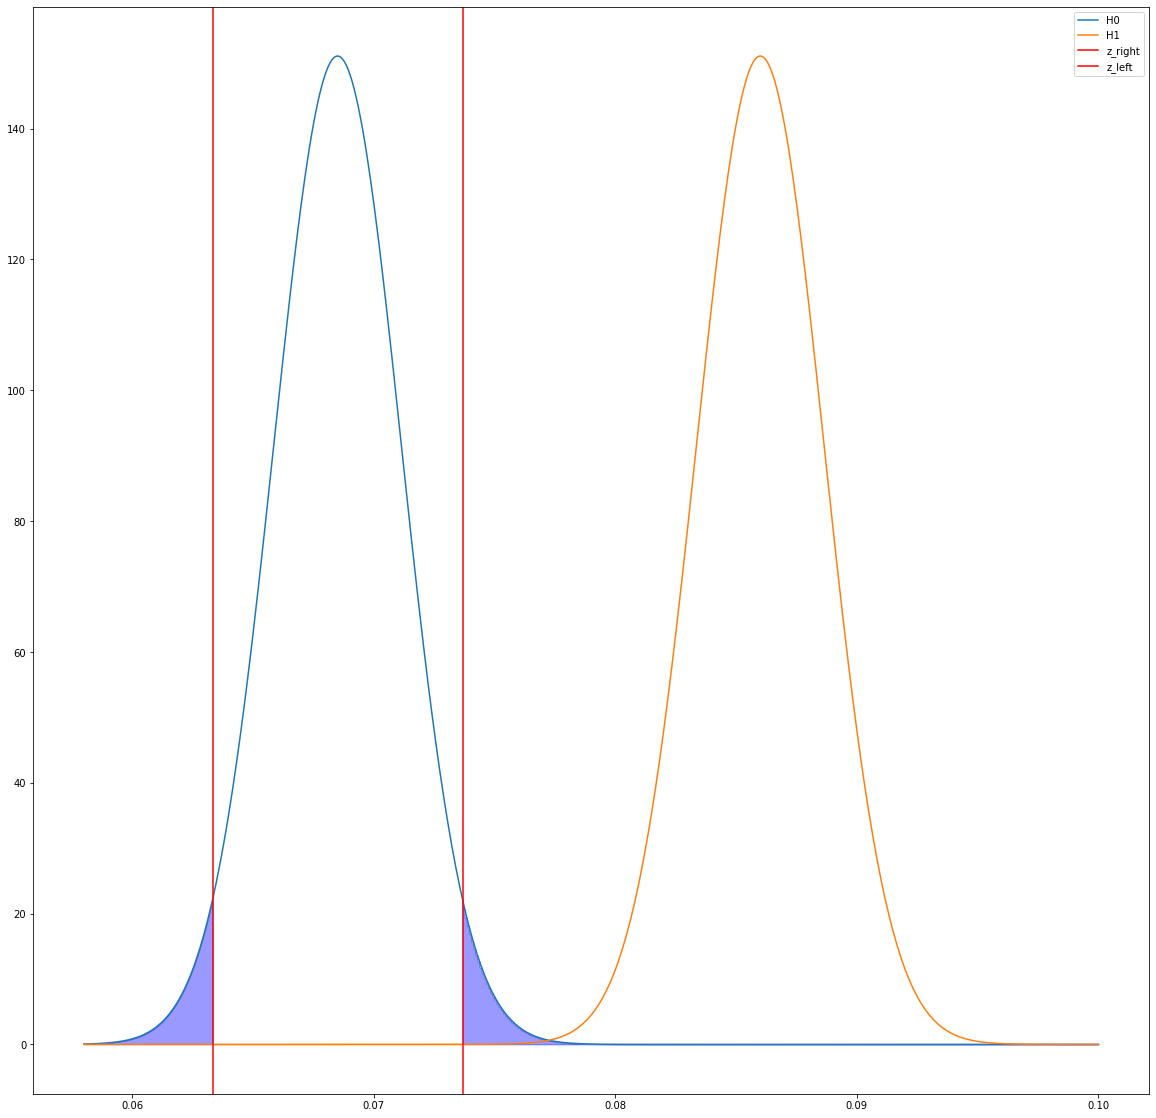

In [98]:
plt.figure(figsize=(20,20))
edge_l, edge_r = 0.058, 0.1
x= np.linspace(edge_l, edge_r, 500)
plt.plot(x, scipy.stats.norm.pdf(x, 0.0685, 0.00264), label="H0")
plt.plot(x, scipy.stats.norm.pdf(x, H1mean, 0.00264), label="H1")
plt.axvline(z_right, c="r", label="z_right")
plt.axvline(z_left, c="r", label="z_left")


x_type1_1 = np.linspace(edge_l, z_left, 300)
x_type1_2 = np.linspace(z_right, edge_r, 300)
plt.fill_between(x_type1_1, scipy.stats.norm.pdf(x_type1_1, 0.0685, 0.00264), color="blue", step="pre", alpha=0.4)
plt.fill_between(x_type1_2, scipy.stats.norm.pdf(x_type1_2, 0.0685, 0.00264), color="blue", step="pre", alpha=0.4)

x_type2 = np.linspace(z_left, z_right, 300)
plt.fill_between(x_type2, scipy.stats.norm.pdf(x_type2, H1mean, 0.00264), color="orange", step="pre", alpha=0.4)

plt.legend()

In [99]:
from statsmodels.stats.proportion import proportions_ztest
count = raleigh_df.offer_accepted.sum()
nobs = raleigh_df.shape[0]
value = 0.0685

In [100]:
proportions_ztest(count, nobs, value)

(6.055416376341698, 1.4005491742963572e-09)

<span style="color:teal">Note that the result is significant, and suggests a *increase* in activation due to the flyer program</span>

Do you see any possible problems in your methodology? What other factors can explain the change in activation, if such a change exists?

<span style="color:teal">Old estimation for activation may not be relevant now, because it is from the past</span>

# A/b test

In order to isolate temporal and environmental effects on activation, we'll run an a/b test, comparing the activation rate in Raleigh to that of Lubbock, TX, another town in which Pagaya operates without a flyer program. 

The activation forms for Lubbock also appear in the `offers` subdirectory of the `ASSIGNMENT1_DATA` folder. Read all files from this folder whose name contains the substring 'lubbock', and create a dataframe of final offers called `lubbock_df`, drop unnecessary rows from it, and enrich it with TU features.

In [101]:
lubbock_forms= (
    s3fs
    .S3FileSystem().glob(
        os.path.join(ASSIGNMENT1_DATA,"offers/*lubbock*")
    )
)

In [102]:
lubbock_df = (
    pd.concat(map(lambda f: pd.read_csv("s3://"+ f), lubbock_forms))
    .sort_values(by = "offer_date", ascending=True)
    .drop_duplicates(subset = "id", keep= "last")
    .merge(tu_data,
          on=["id", "sequence_num"],
          how="left")
)

What is the average interest rate in Lubbock? What is it among accepting borrowers?

In [103]:
lubbock_df.int_rate.mean(), lubbock_df.query("offer_accepted").int_rate.mean()

(15.505397526501778, 13.553895131086156)

What is the average credit score in Lubbock? What is it among accepting borrowers?

In [104]:
lubbock_df.credit_score.mean(), lubbock_df.query("offer_accepted").credit_score.mean()

(690.0338339222615, 730.5337078651686)

What is the rate of activation in Lubbock?

In [105]:
lubbock_df.offer_accepted.mean()

0.04717314487632509

## Caution about a/b test 

Note that this is not a classical a/b test. Usually, in such a test, one creates two random subgroups from the general population and applies a manipulation to one of them in order to see if the manipulation had an effect. However, in this case, it is very complicated to isolate a random subgroup from any population and deploy the flyer program only on it.
Thus, due to production limitation, we have to make do with what we got.

In order to justify the use of an a/b test for this situation, we should at least verify that the borrower population in Lubbock and Raleigh seem as though they were randomly selected from the general population. We have actually already checked it for Raleigh above. Add TU features to the loan amount, interest rate, credit score and term comparisons and see if there any major differences between the three populations (Lubbock, Raleigh and TU).

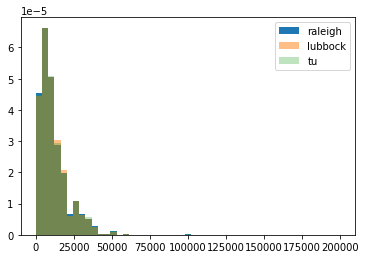

In [106]:
plt.hist(raleigh_df.requested_amount, bins= np.linspace(0,200_000,50), density=True, label="raleigh");
plt.hist(lubbock_df.requested_amount, bins= np.linspace(0,200_000,50), density=True, alpha = 0.5, label= "lubbock");
plt.hist(tu_data.loan_amnt, bins= np.linspace(0,200_000,50), density=True, alpha = 0.3, label="tu");
plt.legend();

/root/wd/venv/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/root/wd/venv/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/root/wd/venv/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

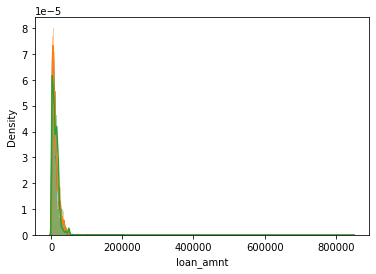

In [107]:
sns.distplot(raleigh_df.requested_amount);
sns.distplot(lubbock_df.requested_amount);
sns.distplot(tu_data.loan_amnt);

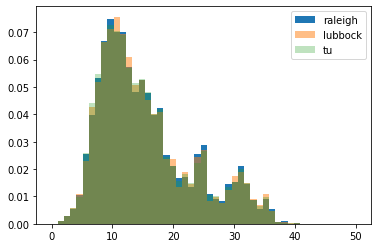

In [108]:
plt.hist(raleigh_df.offered_interest_rate, bins= np.linspace(0,50,50), density=True, label="raleigh");
plt.hist(lubbock_df.offered_interest_rate, bins= np.linspace(0,50,50), density=True, alpha=0.5, label="lubbock");
plt.hist(tu_data.int_rate, bins= np.linspace(0,50,50), density=True, alpha = 0.3, label="tu");
plt.legend();

/root/wd/venv/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/root/wd/venv/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/root/wd/venv/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

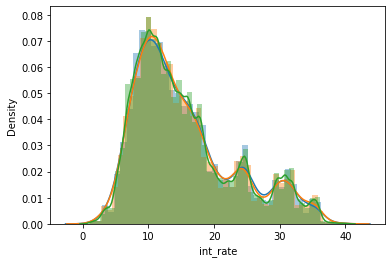

In [109]:
sns.distplot(raleigh_df.offered_interest_rate);
sns.distplot(lubbock_df.offered_interest_rate);
sns.distplot(tu_data.int_rate);

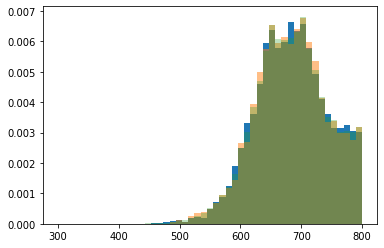

In [110]:
plt.hist(raleigh_df.credit_score, bins= np.linspace(300,800,50), density=True, label="raleigh");
plt.hist(lubbock_df.credit_score, bins= np.linspace(300,800,50), density=True, alpha = 0.5, label= "lubbock");
plt.hist(tu_data.credit_score, bins= np.linspace(300,800,50), density=True, alpha = 0.3, label="tu");

/root/wd/venv/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/root/wd/venv/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/root/wd/venv/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

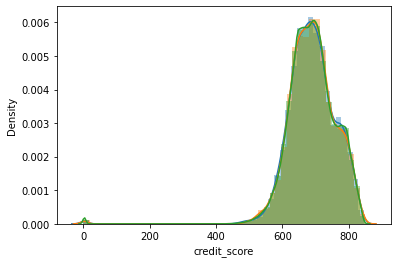

In [111]:
sns.distplot(raleigh_df.credit_score);
sns.distplot(lubbock_df.credit_score);
sns.distplot(tu_data.credit_score);

In [112]:
lubbock_df.listing_term.value_counts(normalize=True)

36.0    0.553534
60.0    0.446466
Name: listing_term, dtype: float64

In [113]:
tu_data.listing_term.value_counts(normalize=True)

36.0    0.557304
60.0    0.442696
Name: listing_term, dtype: float64

## Performing the test

Use the function you created in the file `clt.py` to plot the series of means of activation in Raleigh and Lubbock for samples of size n= 1, 10, 1000 and 1e6, and compare the means of the two histograms. To they seem to converge to the same value?

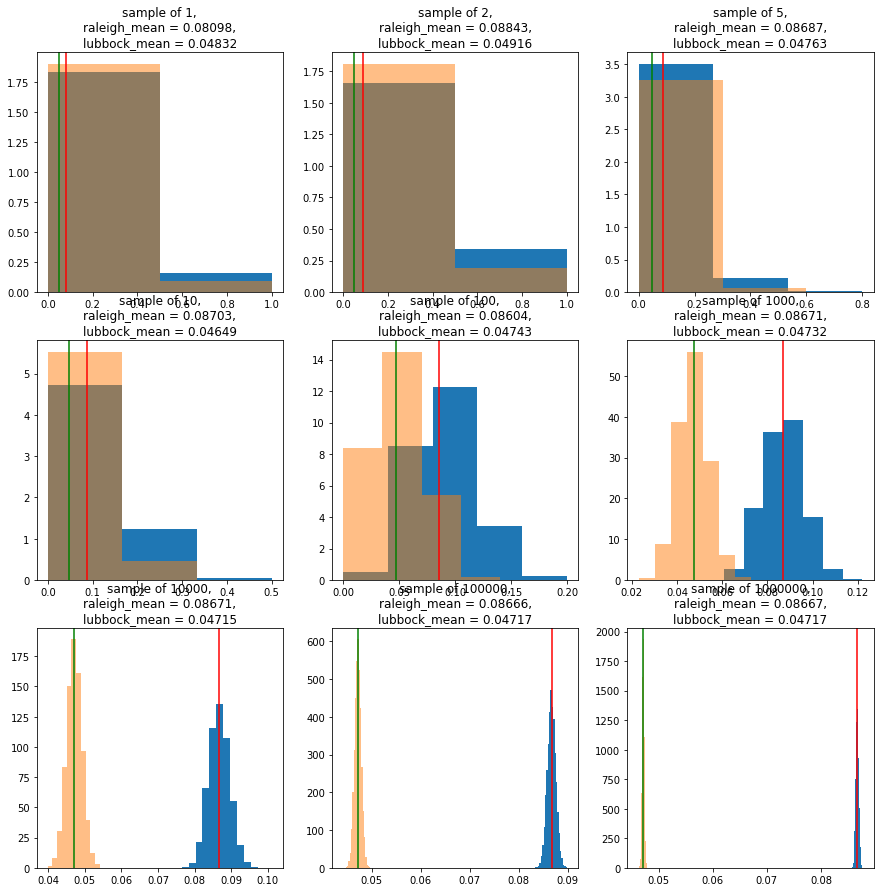

In [114]:
fig, axs = plt.subplots(3, 3, figsize=(15,15))
for i, n in enumerate([1, 2, 5, 10, 100, 1000, 10_000, 100_000, 1_000_000]):
    avg_arr_rl = average_sampler(raleigh_df.offer_accepted, n)
    avg_arr_lb = average_sampler(lubbock_df.offer_accepted, n)
    axs[i // 3, i % 3].hist(avg_arr_rl,  
                            bins=round(np.ceil(np.sqrt(len(np.unique(avg_arr_rl))))),
                            density=True)
    axs[i // 3, i % 3].hist(avg_arr_lb,  
                            bins=round(np.ceil(np.sqrt(len(np.unique(avg_arr_lb))))),
                            density=True,
                            alpha=0.5)
    axs[i//3, i%3].axvline(avg_arr_rl.mean(), color="r");
    axs[i//3, i%3].axvline(avg_arr_lb.mean(), color="g");
    axs[i//3, i%3].title.set_text(f"sample of {n},\nraleigh_mean = {avg_arr_rl.mean():.5f},\nlubbock_mean = {avg_arr_lb.mean():.5f}");
    

Apply a statistical test to see whether the activation rate in Raleigh, NC is significantly larger than Lubbock, TX. Clearly state and validate your test's assumption. 

1. What are your hypotheses?
2. Setting your confidence level at 95%, what is the probability of an error of type I in your test? What is the probability of a type II error?
3. Are the two samples significantly different? 
4. Interpret your results. Can you declare the program as successful in increasing activation? What is the probability of wrongfully declaring it successful?

In [115]:
from statsmodels.stats.proportion import proportions_ztest

Use the `proportions_ztest` function from `statsmodels.stats.proportion` to perform a comparison between the activation probability in Lubbock and in Raleigh. 

In [116]:
count = [lubbock_df.offer_accepted.sum(), raleigh_df.offer_accepted.sum()]
nobs = [lubbock_df.shape[0], raleigh_df.shape[0]]

In [131]:
p_hat = sum(count)/ sum(nobs)
np.sqrt(p_hat * (1- p_hat) * (1/ np.array(nobs)).sum())

0.0034903700197736662

In [117]:
proportions_ztest(count, nobs)

(-11.315864686822128, 1.0951717760291721e-29)

<span style="color:teal">
In a comparison proportion test, our hypotheses are:

$H_0$: $p_1-p_2 =0$,

$H_1$: $p_1-p_2 \ne 0$,
    
where $p_1$ and $p_2$ denote the proportion in the first and second population, respectively. 
In our case, we can compute $p_1,p_2$ to get $p_1= 0.0866$ and $p_2=0.0474$. The variance estimator in this setting is $$\hat{s}=\sqrt{\hat{p}(1-\hat{p})}\left(\frac{1}{n_1}+\frac{1}{n_2}\right)\text{ where }\hat{p}=\frac{\#\text{successes in both populations}}{\#\text{observations in both populations}}=0.0644$$
So $\hat{s} = 0.0035$.
    
Using this information and using the method from the ordinary proportion test above, we can easily compute the probabilty of a type II error after we fix the hypothesized difference between populations under $H_1$. Here, we'll take $p_1-p_2= 0.0392$.
</span>

In [133]:
z_left = sst.norm.ppf(0.025, loc = 0, scale= 0.0035)
z_right = sst.norm.ppf(0.975, loc = 0, scale= 0.0035)
H1mean = 0.0392

In [134]:
print(f"The probability of a type II error is "
      f"{scipy.stats.norm.cdf(z_right, H1mean, 0.0035) -scipy.stats.norm.cdf(z_left, H1mean, 0.0035)}")

The probability of a type II error is 1.2320714061927557e-20


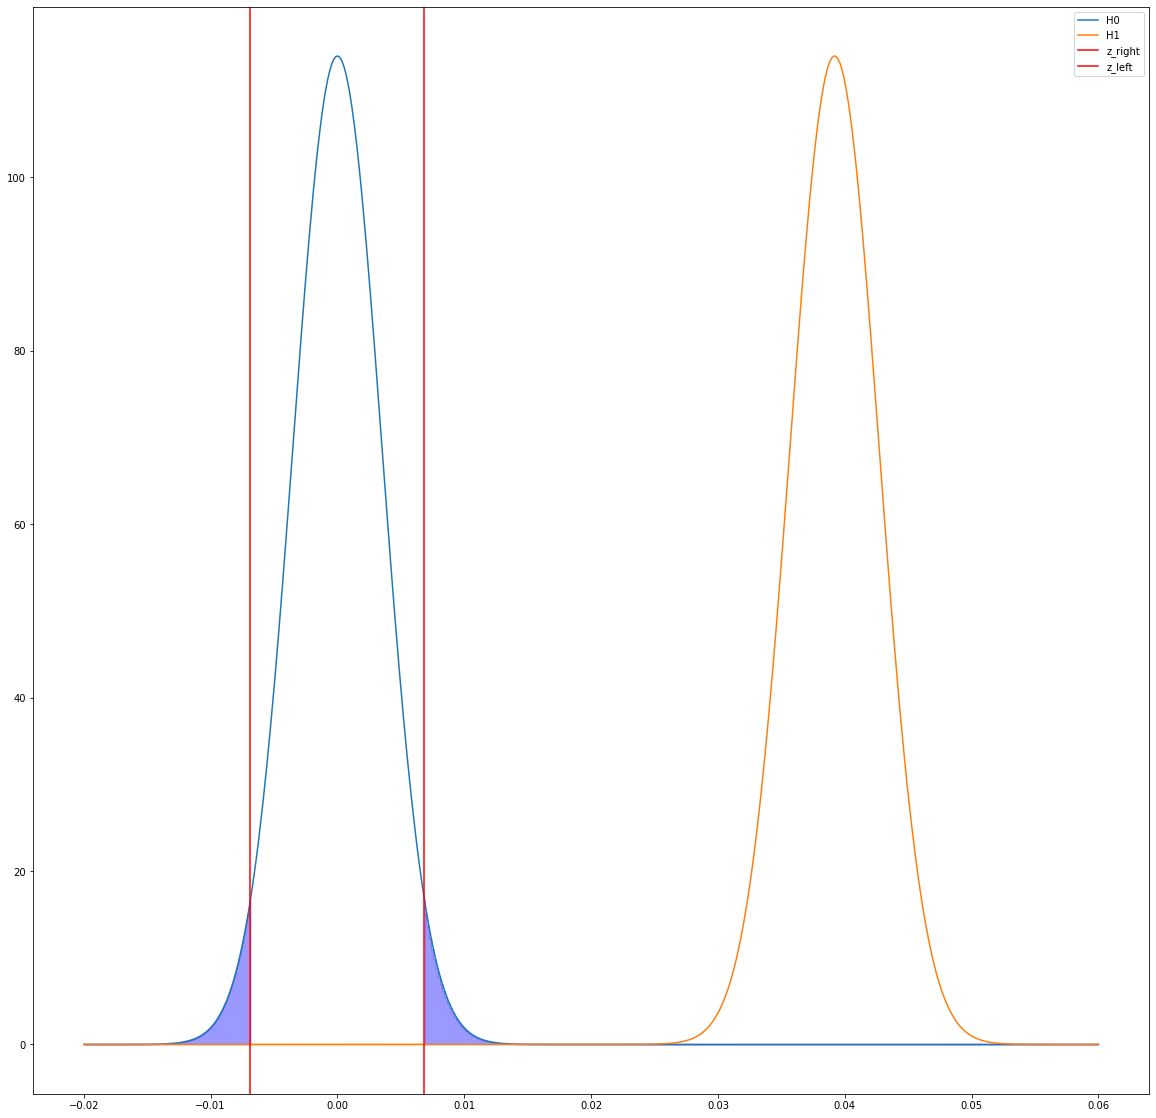

In [138]:
plt.figure(figsize=(20,20))
edge_l, edge_r = -0.02, 0.06

x= np.linspace(edge_l, edge_r, 500)
plt.plot(x, scipy.stats.norm.pdf(x, 0, 0.0035), label="H0")
plt.plot(x, scipy.stats.norm.pdf(x, H1mean, 0.0035), label="H1")
plt.axvline(z_right, c="r", label="z_right")
plt.axvline(z_left, c="r", label="z_left")


x_type1_1 = np.linspace(edge_l, z_left, 300)
x_type1_2 = np.linspace(z_right, edge_r, 300)
plt.fill_between(x_type1_1, scipy.stats.norm.pdf(x_type1_1, 0, 0.0035), color="blue", step="pre", alpha=0.4)
plt.fill_between(x_type1_2, scipy.stats.norm.pdf(x_type1_2, 0, 0.0035), color="blue", step="pre", alpha=0.4)

x_type2 = np.linspace(z_left, z_right, 300)
plt.fill_between(x_type2, scipy.stats.norm.pdf(x_type2, H1mean, 0.0035), color="orange", step="pre", alpha=0.4)

plt.legend()

Interprest your results; do you observe a significant change in activation in Raleigh? What is the probability of wrongfully declaring the program successful?

<span style="color:teal">Yes, a higher activation rate in Raleigh compared to Lubbock</span>

# Testing for activation in sub-populations

Now that you applied the a/b test to the Lubbock and Raleigh datasets, it is now required that you make a similar comparison on different subsets of the data within various credit score and loan amount bins. To do so, let us first decide on how to segment our data.

You are asked to divide your data into 10 bins according to loan amount, and then divide each of those bins into 10 bins according to loan amount. The most staightforward way of doing this is by using the `pd.qcut` function; first dividing the data into 10 quantiles of credit score and then dividing each of these quantiles into 10 according to loan amount.

Divide your datasets as above and add two columns to your data which indicate the (credit_score, loan_amnt) of the bin.

In [ ]:
bins = (
    tu_data[["credit_score", "loan_amnt"]]
    .assign(credit_score_bin = lambda df: pd.qcut(df.credit_score, 10))
    .groupby("credit_score_bin")
    .apply(lambda df: sorted(pd.qcut(df.loan_amnt, 10).unique()))
    .sort_index()
    .explode()
    .to_frame(name= "loan_amnt_bin")
    .reset_index()
)

In [ ]:
bins

In [ ]:
tu_data["credit_score_bin"]= pd.qcut(tu_data.credit_score, q=10)

In [ ]:
tu_data.credit_score_bin.value_counts()

In [ ]:
bins

In [ ]:
for _, (cs_bin, la_bin) in bins.iterrows():
    raleigh_df.loc[raleigh_df.credit_score.between(cs_bin.left, cs_bin.right), "credit_score_bin"] = cs_bin
    raleigh_df.loc[raleigh_df.credit_score.between(cs_bin.left, cs_bin.right) &
                   raleigh_df.loan_amnt.between(la_bin.left, la_bin.right)
                   , "loan_amnt_bin"] = la_bin
    lubbock_df.loc[lubbock_df.credit_score.between(cs_bin.left, cs_bin.right), "credit_score_bin"] = cs_bin
    lubbock_df.loc[lubbock_df.credit_score.between(cs_bin.left, cs_bin.right) &
                   lubbock_df.loan_amnt.between(la_bin.left, la_bin.right)
                   , "loan_amnt_bin"] = la_bin

Run an a/b test on each of the bins in your data and create a $10\times 10$ table containing the $p$ value of each test. Also create a table of booleans indicating which of the tests gave a significant result.

In [ ]:
res_table = np.empty(shape=(10,10), dtype="float64")
for i, (cs_bin, la_bin) in bins.iterrows():
    raleigh_in_bin = raleigh_df[(raleigh_df["credit_score_bin"] == cs_bin) & (raleigh_df["loan_amnt_bin"]  == la_bin)]
    lubbock_in_bin = lubbock_df[(lubbock_df["credit_score_bin"] == cs_bin) & (lubbock_df["loan_amnt_bin"]  == la_bin)]
    count = [lubbock_in_bin.offer_accepted.sum(), raleigh_in_bin.offer_accepted.sum()]
    nobs = [lubbock_in_bin.shape[0], raleigh_in_bin.shape[0]]
    res_table[i //10 , i % 10] = proportions_ztest(count, nobs)[1]

In [ ]:
pd.DataFrame(res_table)

In [ ]:
sns.heatmap(res_table < 0.05)

What is the probability of falsely rejecting the null hypothesis in each cell? What is the probability of falsely rejecting the null hypothesis in at least one of the cells (i.e. what is the **family wise error rate**)?

In other words, given that we made $m$ experiments, with confidence level $\alpha$, what is the probabilty $\mathbb{P}\left(\bigcup_i X_i \le q_{\alpha}\right)$? 

_Note_: you may assume that sampling from different bins are independent.

In [ ]:
1 - 0.95 ** 100

<span style="color:teal">
    Assuming independence of sampling, we have the following:
    $$
    \mathbb{P}\left(\bigcup_{i=1}^m X_i\le q_\alpha\right) = 
    1 - \mathbb{P}\left(\bigcap_i X_i > q_\alpha\right) = 
    1 - \prod_i \mathbb{P}(X_i > q_\alpha) = 1 - (1-\alpha)^m
    $$
Specifically, since we conducted 100 experiments at a confidence level of 95%, the FWER of our entire experiment is
    $$ 1 - 0.95^{100} = 0.994079$$
That is, the probability of falsely rejecting the null hypothesis at *some* point of the experiment is over 99%!!!
<span>

## Bonferroni correction 

One way of assuring that your FWER remains below $\alpha=0.05$ is to apply a <a href="https://en.wikipedia.org/wiki/Bonferroni_correction">**Bonferroni correction**</a>. This means that we set the signficance level of each individual test to $\alpha/m$, where $m=100$ is the number of tests (see, e.g., Wikipedia for an explanation). 

Use a Bonferroni correction on your segmented a/b test and output a $10\times10$ table of boolean values, indicating which test gave a significant result under this correction.

In [ ]:
sns.heatmap(res_table< 0.05/100)

How many of your tests came out significant under this correction?

<span style= "color:teal"> Only one of our expreiments came out significany under the Bonnefroni correction</span>

## BH correction 

The Bonferroni correction is often criticized for being too restrictive, as you probably noticed in the last subsection. A more commonly used method for correcting $\alpha$ values is the Benjamini-Hochberg method. You can <a href="https://www.youtube.com/watch?v=K8LQSvtjcEo">check out the quest</a> for a nice explanation about it.

Start by arranging the $p$-values of your original test as a series and listing them in ascending order. You can use the `pd.DataFrame.stack` and `pd.Series.sort_values` methods.

In [ ]:
bh_arg_sort = np.argsort(res_table.reshape(-1))

In [ ]:
bh_sorted_probs = res_table.reshape(-1)[bh_arg_sort]

Plot your sorted $p$-values

In [ ]:
plt.plot(bh_sorted_probs)

For each entry of the new series, compute the value compute the value $\frac{i}{m}\cdot\alpha$, where $i$ is the ordinal place of the entry (i.e. 1,2,...len(series)), $m=100$ and $\alpha=0.05$ as above. Add a plot of these values to your $p$-values plot.

In [ ]:
plt.plot(bh_sorted_probs)
plt.plot(np.arange(1, len(bh_sorted_probs)+1) * 0.05/100)

Find the largest index $i$ for which the $p$-value in the $i$-th place in the series is smaller than $\frac{i}{m}\cdot\alpha$. That is- the last index in the plot you just created where the $p$-values line lies below the _adjusted_-$\alpha$ line.

In [ ]:
bh_sorted_probs  <= np.arange(1, len(bh_sorted_probs)+1) * 0.05/100

In [ ]:
bh_alphas = (np.arange(1, len(bh_sorted_probs)+1) * 0.05/100)[np.argsort(bh_arg_sort)].reshape(10,10)


In [ ]:
sns.heatmap(res_table < bh_alphas)

Reject the null hypothesis for all test before and including this index, and accept it for all others. Reformat your table into a $10\times 10$ dataframe; for which bins did we get a significant result in the corrected test?

### Validating your results

You can validate your results (for both corrections) using the <a href= "https://www.statsmodels.org/dev/generated/statsmodels.stats.multitest.multipletests.html">`statsmodels.stats.multitest.multipletests`</a> package.

In [ ]:
from statsmodels.stats.multitest import multipletests

In [ ]:
sns.heatmap(multipletests(res_table.reshape(-1), alpha = 0.05, method= "bonferroni")[0].reshape(10,10))

In [ ]:
sns.heatmap(multipletests(res_table.reshape(-1), alpha = 0.05, method= "fdr_bh")[0].reshape(10, 10))

In [ ]:
sns.heatmap(res_table<0.05)

In [ ]:

raleigh_df.offer_accepted.mean(), lubbock_df.offer_accepted.mean()